### Purpose: To build a mini-batch gradient descent optimization algorithm  

In [33]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython import display
from IPython.display import HTML
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Here, I will try to build a mini-batch gradient descent optimization algorithm class from scratch and side by side run it on a dataset named - 'Student's performance'. The problem I will be working on is a supervised machine learning regression based problem.

This dataset has 10000 rows and (5+1) columns. Predictors = 5, and Label =1.

I will try to calculate the optimized parameters for this given dataset, and also compare it with the sklearn module LinearRegression class.

After that, I will try to plot some graphs which will give a better intuition about how my model is performing with increasing epochs.

In [2]:
# loading the dataset
df = pd.read_csv(r'C:\Users\nilay\OneDrive\Desktop\Dataset\4. Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.shape

(10000, 6)

In [4]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
# Duplicate makes sense in this dataset. So I will prefer not remove them
df.duplicated().sum()

127

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df['Hours Studied'] = df['Hours Studied'].astype('int16')
df['Previous Scores'] = df['Previous Scores'].astype('int16')
df['Extracurricular Activities'] = df['Extracurricular Activities'].str.replace('Yes','1')
df['Extracurricular Activities'] = df['Extracurricular Activities'].str.replace('No','0')
df['Extracurricular Activities'] = df['Extracurricular Activities'].astype('int8')
df['Sleep Hours'] = df['Sleep Hours'].astype('int8')
df['Sample Question Papers Practiced'] = df['Sample Question Papers Practiced'].astype('int8')
df['Performance Index'] = df['Performance Index'].astype('int32')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int16
 1   Previous Scores                   10000 non-null  int16
 2   Extracurricular Activities        10000 non-null  int8 
 3   Sleep Hours                       10000 non-null  int8 
 4   Sample Question Papers Practiced  10000 non-null  int8 
 5   Performance Index                 10000 non-null  int32
dtypes: int16(2), int32(1), int8(3)
memory usage: 107.6 KB


In [9]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [10]:
# splitting my columns into input features(X) and output label(Y)
X = df.iloc[:,:5]
y = df.iloc[:,-1]

In [11]:
# applying MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.75      , 1.        , 1.        , 1.        , 0.11111111],
       [0.375     , 0.71186441, 0.        , 0.        , 0.22222222],
       [0.875     , 0.18644068, 1.        , 0.6       , 0.22222222],
       ...,
       [0.625     , 0.72881356, 1.        , 0.8       , 0.55555556],
       [1.        , 0.96610169, 1.        , 0.6       , 0.        ],
       [0.75      , 0.57627119, 0.        , 0.8       , 0.11111111]])

In [12]:
# applying train-test split
x_train, x_test, y_train, y_test =  train_test_split(X,y,test_size=0.20, random_state = 2)
x_train.shape, x_test.shape

((8000, 5), (2000, 5))

In [13]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [14]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [15]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [16]:
# applying Linear Regression class from sklearn module
lr = LinearRegression()
lr.fit(x_train, y_train)

print('Intercept :',lr.intercept_)
print('Coefficients :',lr.coef_)

y_pred = lr.predict(x_test)
print('r2_score :',r2_score(y_test, y_pred))

Intercept : 11.392456516941756
Coefficients : [22.82816873 60.15623629  0.59483017  2.41571759  1.77947912]
r2_score : 0.9890954655668953


In [28]:
# creating my own class

class MiniBatchGD:
    def __init__(self, batch_size, learning_rate=0.01, epochs=50 ):
        self.bias = None
        self.coef = None
        self.lr=learning_rate
        self.epochs=epochs
        self.batch_size=batch_size
        self.c=[]
        self.b1, self.b2, self.b3, self.b4, self.b5 = [],[],[],[],[]
        self.loss = []
        self.iter_=[]
        
        
    def parameters(self):
        return self.bias, self.coef
    
    def real_time_params(self):
        return self.c, self.b1, self.b2, self.b3, self.b4, self.b5, self.loss, self.iter_
        
    def fit(self, x_train, y_train):
        self.bias = 0
        self.coef = np.ones(x_train.shape[1])
        self.nos_of_batch = x_train.shape[0]//self.batch_size
        count_=0 
        
        for i in range(self.epochs):
            for j in range(self.nos_of_batch):
                if j%10==0:
                    self.c.append(self.bias)
                    self.b1.append(self.coef[0])
                    self.b2.append(self.coef[1])
                    self.b3.append(self.coef[2])
                    self.b4.append(self.coef[3])
                    self.b5.append(self.coef[4])
                    self.iter_.append(count_)
                count_+=1
                
                idx = np.random.randint(0,x_train.shape[0],self.batch_size)
                y_hat = self.bias + np.dot( x_train[idx], self.coef)
                if j%10==0:
                    self.loss.append(np.mean(np.square(y_train[idx] - y_hat)))
                
                bias_slope = -2 * np.mean(y_train[idx] - y_hat)
                coef_slope = (-2/self.batch_size) * np.dot((y_train[idx] - y_hat), x_train[idx])
                
                self.bias = self.bias - (self.lr * bias_slope)
                self.coef = self.coef - (self.lr * coef_slope )
                
    def predict(self, x_test):
        return self.bias + np.dot(x_test, self.coef)

In [29]:
mbgd = MiniBatchGD(batch_size = 100 , learning_rate = 0.01, epochs = 40)
mbgd.fit(x_train, y_train)

bias, coef = mbgd.parameters()
print('Intercept b0 :',bias)
print('Coefficients :', coef)

y_pred = mbgd.predict(x_test)
print('r2_score : ',r2_score(y_test, y_pred))

Intercept b0 : 12.304984443115208
Coefficients : [22.45780358 59.53635309  0.49627333  2.14147854  1.47786357]
r2_score :  0.9890107967401777


Result of LinearRegression class of sklearn module -

    Intercept : 11.392456516941756
    Coefficients : [22.82816873 60.15623629  0.59483017  2.41571759  1.77947912]
    r2_score : 0.9890954655668953

In [30]:
# analysing with the graphs
c, b1, b2, b3, b4, b5, loss, iter_  = mbgd.real_time_params()

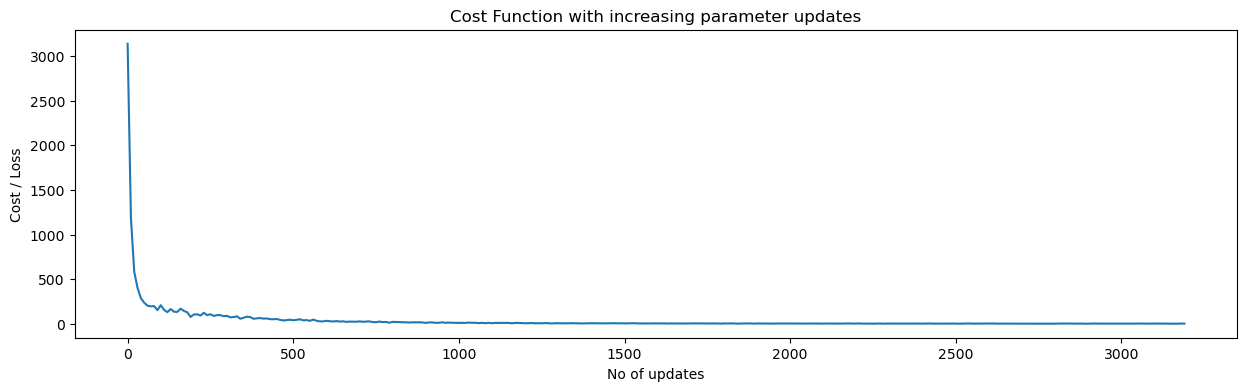

In [31]:
# analysing cost function with increasing updates
plt.figure(figsize=(15,4))
plt.xlabel('No of updates')
plt.ylabel('Cost / Loss')
plt.title('Cost Function with increasing parameter updates')
plt.plot(iter_, loss);

In [43]:
# initializing a figure 
fig = plt.figure(figsize=(10,3)) 
  
# labeling the x-axis and y-axis 
axis = plt.axes(xlim=(-100, 3500),  ylim=(-1000, 3500)) 
plt.xlabel('Iteration')
plt.ylabel('Loss / Cost')
  
# lists storing x and y values 
x, y = [], [] 
  
line, = axis.plot(0, 0, '--', color='blue') 
  
  
def animate(i): 
    line.set_xdata(iter_[:i]) 
    line.set_ydata(loss[:i]) 
    return line, 
  
  
anim = FuncAnimation(fig, animate, frames=350, interval=10, blit=True) 
fig.suptitle('Cost Function with increasing updates', fontsize=14) 

# video = anim.to_html5_video()
# html = display.HTML(video)
# display.display(html) 
# plt.close() 
writervideo = animation.FFMpegWriter(fps=60) 
anim.save('Mini-batch_Gradient_Descent - Cost_Function with increasing parameter updates.mp4', writer=writervideo) 
plt.close() 

Intercept b0:  12.304984443115208


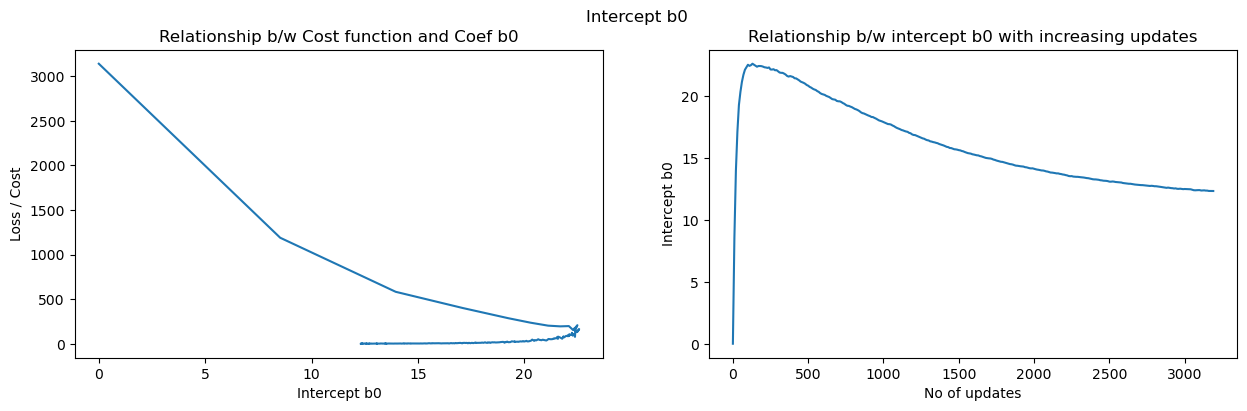

In [36]:
# coef c
print("Intercept b0: ",mbgd.bias)

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Intercept b0')
ax[0].plot(c, loss)
ax[0].set_xlabel('Intercept b0')
ax[0].set_ylabel('Loss / Cost')
ax[0].set_title('Relationship b/w Cost function and Coef b0')

ax[1].plot(iter_, c)
ax[1].set_xlabel('No of updates')
ax[1].set_ylabel('Intercept b0')
ax[1].set_title('Relationship b/w intercept b0 with increasing updates');

Coef b1 :  22.457803578122366


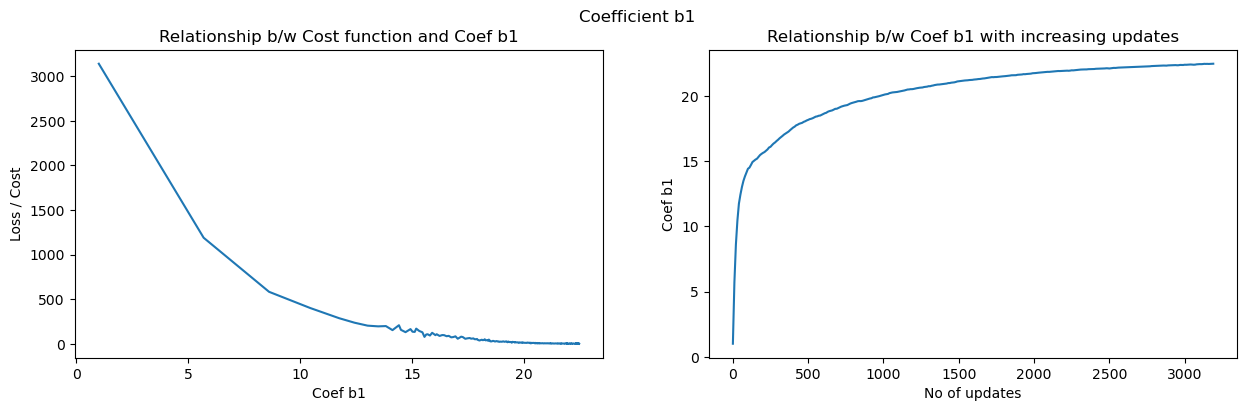

In [37]:
# coef b1
print("Coef b1 : ",mbgd.coef[0])

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Coefficient b1')
ax[0].plot(b1, loss)
ax[0].set_xlabel('Coef b1')
ax[0].set_ylabel('Loss / Cost')
ax[0].set_title('Relationship b/w Cost function and Coef b1')

ax[1].plot(iter_, b1)
ax[1].set_xlabel('No of updates')
ax[1].set_ylabel('Coef b1')
ax[1].set_title('Relationship b/w Coef b1 with increasing updates');

Coef b2 :  59.53635309011274


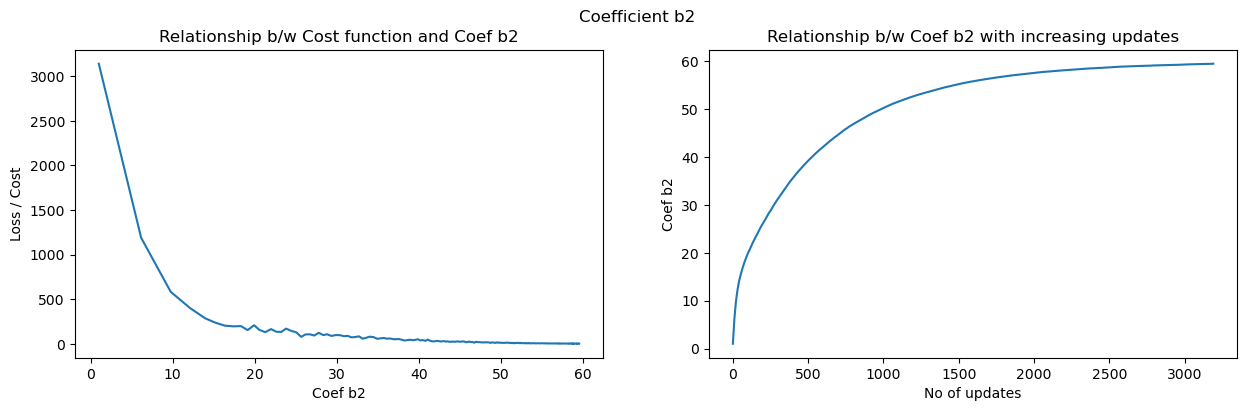

In [38]:
# coef b2
print("Coef b2 : ",mbgd.coef[1])

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Coefficient b2')
ax[0].plot(b2, loss)
ax[0].set_xlabel('Coef b2')
ax[0].set_ylabel('Loss / Cost')
ax[0].set_title('Relationship b/w Cost function and Coef b2')

ax[1].plot(iter_, b2)
ax[1].set_xlabel('No of updates')
ax[1].set_ylabel('Coef b2')
ax[1].set_title('Relationship b/w Coef b2 with increasing updates');

Coef b3 :  0.4962733273263826


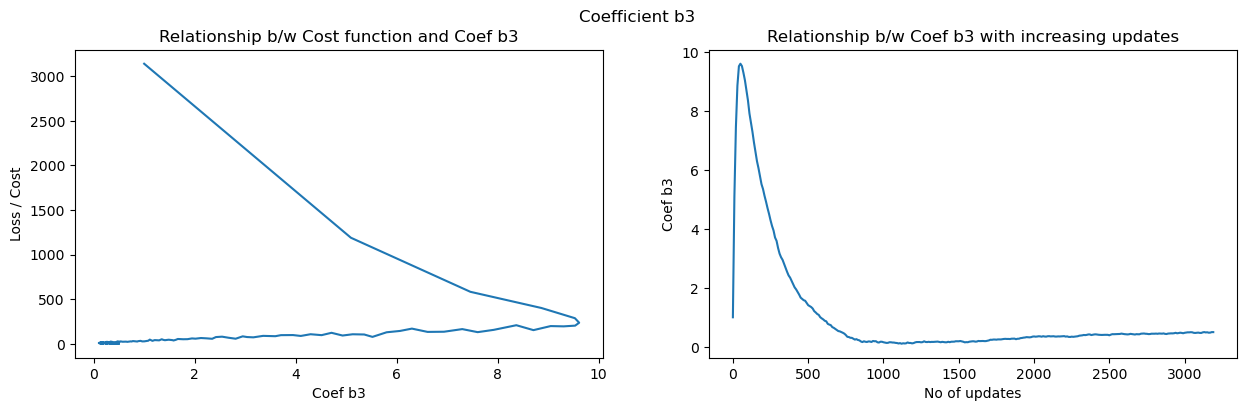

In [40]:
# coef b3
print("Coef b3 : ",mbgd.coef[2])

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Coefficient b3')
ax[0].plot(b3, loss)
ax[0].set_xlabel('Coef b3')
ax[0].set_ylabel('Loss / Cost')
ax[0].set_title('Relationship b/w Cost function and Coef b3')

ax[1].plot(iter_, b3)
ax[1].set_xlabel('No of updates')
ax[1].set_ylabel('Coef b3')
ax[1].set_title('Relationship b/w Coef b3 with increasing updates');

Coef b4 :  2.1414785370679246


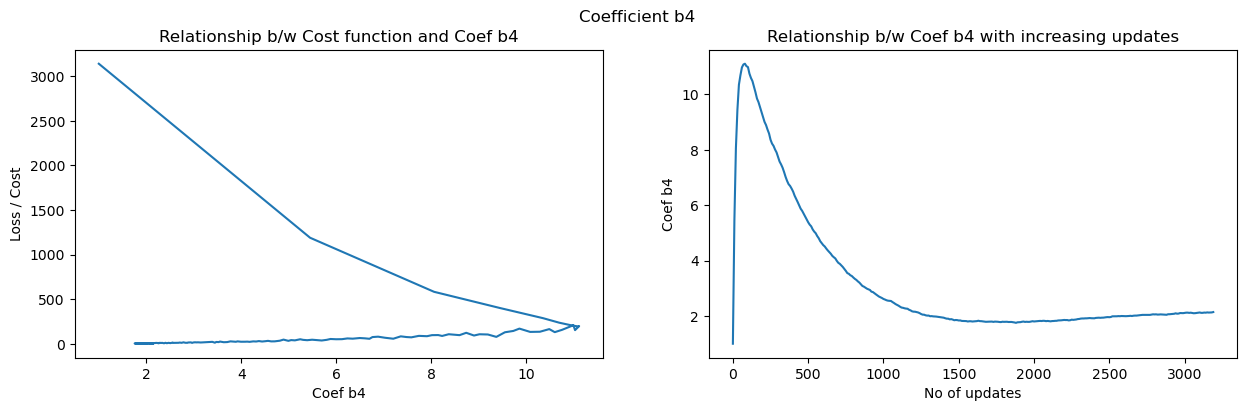

In [41]:
# coef b4
print("Coef b4 : ",mbgd.coef[3])

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Coefficient b4')
ax[0].plot(b4, loss)
ax[0].set_xlabel('Coef b4')
ax[0].set_ylabel('Loss / Cost')
ax[0].set_title('Relationship b/w Cost function and Coef b4')

ax[1].plot(iter_, b4)
ax[1].set_xlabel('No of updates')
ax[1].set_ylabel('Coef b4')
ax[1].set_title('Relationship b/w Coef b4 with increasing updates');

Coef b5 :  1.4778635710194885


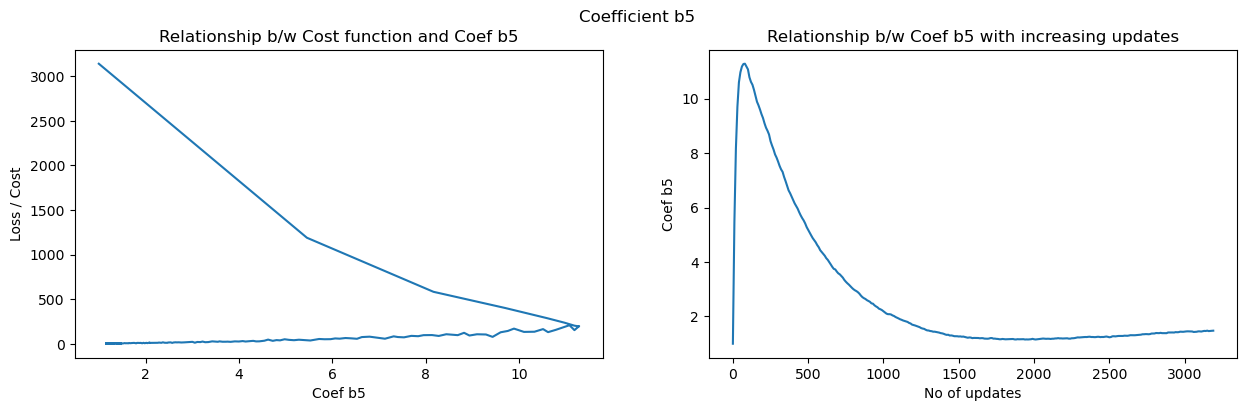

In [42]:
# coef b5
print("Coef b5 : ",mbgd.coef[4])

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Coefficient b5')
ax[0].plot(b5, loss)
ax[0].set_xlabel('Coef b5')
ax[0].set_ylabel('Loss / Cost')
ax[0].set_title('Relationship b/w Cost function and Coef b5')

ax[1].plot(iter_, b5)
ax[1].set_xlabel('No of updates')
ax[1].set_ylabel('Coef b5')
ax[1].set_title('Relationship b/w Coef b5 with increasing updates');